# **Reto|Aprendizaje No Supervisado|Claudio Mejia**

In [ ]:
from sklearn import cluster, metrics
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# **1. Leer el DataFrame**

In [ ]:
train = pd.read_csv("/content/Train (1).csv")
train

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,EID_16328,F,23.0,5,Married,Franklin,Operarions,Behavioral,4.0,1,...,type3,3.0,1,0.7516,-0.4537,2.0,3,7,3,0.7839
6996,EID_8387,F,44.0,1,Married,Lebanon,R&D,Analytical,16.0,2,...,type3,3.0,2,-0.1048,-2.7762,2.0,4,8,4,0.1055
6997,EID_8077,F,49.0,3,Single,Springfield,IT,Directive,10.0,1,...,type2,4.0,2,-0.1048,-0.4537,2.0,4,8,3,0.7847
6998,EID_19597,F,47.0,3,Married,Washington,Sales,Behavioral,24.0,1,...,type0,2.0,4,0.7516,1.8688,2.0,3,6,3,0.4162


In [ ]:
train.shape

(7000, 24)

# **2. Explorar la información general**

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        6588 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            6856 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  6991 non-null   float

In [ ]:
train.columns

Index(['Employee_ID', 'Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7', 'Attrition_rate'],
      dtype='object')

In [ ]:
train.dtypes.value_counts()

,count
int64,9
float64,8
object,7


# **3. Revisar valores faltantes**

In [ ]:
train.isna().sum()

,0
Employee_ID,0
Gender,0
Age,412
Education_Level,0
Relationship_Status,0
Hometown,0
Unit,0
Decision_skill_possess,0
Time_of_service,144
Time_since_promotion,0


# **4. Estadísticas descriptivas de variables numéricas**

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,6588.0,39.622799,13.606920,19.0000,27.0000,37.00000,52.0000,65.0000
Education_Level,7000.0,3.187857,1.065102,1.0000,3.0000,3.00000,4.0000,5.0000
Time_of_service,6856.0,13.385064,10.364188,0.0000,5.0000,10.00000,21.0000,43.0000
Time_since_promotion,7000.0,2.367143,1.149395,0.0000,1.0000,2.00000,3.0000,4.0000
growth_rate,7000.0,47.064286,15.761406,20.0000,33.0000,47.00000,61.0000,74.0000
Travel_Rate,7000.0,0.817857,0.648205,0.0000,0.0000,1.00000,1.0000,2.0000
Post_Level,7000.0,2.798000,1.163721,1.0000,2.0000,3.00000,3.0000,5.0000
Pay_Scale,6991.0,6.006294,2.058435,1.0000,5.0000,6.00000,8.0000,10.0000
Work_Life_balance,6989.0,2.387895,1.122786,1.0000,1.0000,2.00000,3.0000,5.0000
VAR1,7000.0,3.098571,0.836377,1.0000,3.0000,3.00000,3.0000,5.0000


# **5. Distribución de variables categóricas**

In [ ]:
 train.select_dtypes(include=['object']).columns.tolist()

['Employee_ID',
 'Gender',
 'Relationship_Status',
 'Hometown',
 'Unit',
 'Decision_skill_possess',
 'Compensation_and_Benefits']

In [ ]:
train['Gender'].value_counts()

,count
Gender,
F,4114
M,2886


In [ ]:
train['Relationship_Status'].value_counts()

,count
Relationship_Status,
Married,4520
Single,2480


In [ ]:
train['Hometown'].value_counts()

,count
Hometown,
Lebanon,2070
Springfield,1736
Franklin,1523
Washington,1106
Clinton,565


In [ ]:
train['Unit'].value_counts()

,count
Unit,
IT,1394
Logistics,1173
Sales,943
Operarions,706
R&D,680
Purchasing,504
Accounting and Finance,496
Human Resource Management,344
Marketing,212


In [ ]:
train['Decision_skill_possess'].value_counts()

,count
Decision_skill_possess,
Conceptual,1756
Analytical,1755
Directive,1753
Behavioral,1736


In [ ]:
train['Compensation_and_Benefits'].value_counts()

,count
Compensation_and_Benefits,
type2,3945
type3,2382
type4,353
type0,187
type1,133


# **🛠️ Preprocesamiento de los datos**

# 7. Eliminar columnas **innecesarias**

In [ ]:
train = train.drop(columns=['Employee_ID'])

# 8. Manejo de valores **faltantes**

In [ ]:
train.isna().sum()

,0
Gender,0
Age,412
Education_Level,0
Relationship_Status,0
Hometown,0
Unit,0
Decision_skill_possess,0
Time_of_service,144
Time_since_promotion,0
growth_rate,0


In [ ]:
train.dtypes

,0
Gender,object
Age,float64
Education_Level,int64
Relationship_Status,object
Hometown,object
Unit,object
Decision_skill_possess,object
Time_of_service,float64
Time_since_promotion,int64
growth_rate,int64


In [ ]:
train["VAR2"].unique()

array([ 0.7516, -0.9612, -1.8176, -0.1048,     nan,  1.6081])

In [ ]:
train["VAR4"].unique()

array([ 2.,  3., nan,  1.])

In [ ]:
#imputacion de valores faltantes
train['Age'].fillna(train['Age'].median(), inplace=True)
train['Time_of_service'].fillna(train['Time_of_service'].median(), inplace=True)
train['Pay_Scale'].fillna(train['Pay_Scale'].median(), inplace=True)
train['Work_Life_balance'].fillna(train['Work_Life_balance'].median(), inplace=True)
train['VAR2'].fillna(train['VAR2'].mean(), inplace=True)
train['VAR4'].fillna(train['VAR4'].median(), inplace=True)

In [ ]:
train.isna().sum()

,0
Gender,0
Age,0
Education_Level,0
Relationship_Status,0
Hometown,0
Unit,0
Decision_skill_possess,0
Time_of_service,0
Time_since_promotion,0
growth_rate,0


# **9. Detección y Tratamiento de Outliers**

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,7000.0,39.468429,13.214784,19.0000,28.0000,37.000000,51.0000,65.0000
Education_Level,7000.0,3.187857,1.065102,1.0000,3.0000,3.000000,4.0000,5.0000
Time_of_service,7000.0,13.315429,10.268266,0.0000,5.0000,10.000000,20.0000,43.0000
Time_since_promotion,7000.0,2.367143,1.149395,0.0000,1.0000,2.000000,3.0000,4.0000
growth_rate,7000.0,47.064286,15.761406,20.0000,33.0000,47.000000,61.0000,74.0000
Travel_Rate,7000.0,0.817857,0.648205,0.0000,0.0000,1.000000,1.0000,2.0000
Post_Level,7000.0,2.798000,1.163721,1.0000,2.0000,3.000000,3.0000,5.0000
Pay_Scale,7000.0,6.006286,2.057112,1.0000,5.0000,6.000000,8.0000,10.0000
Work_Life_balance,7000.0,2.387286,1.122009,1.0000,1.0000,2.000000,3.0000,5.0000
VAR1,7000.0,3.098571,0.836377,1.0000,3.0000,3.000000,3.0000,5.0000


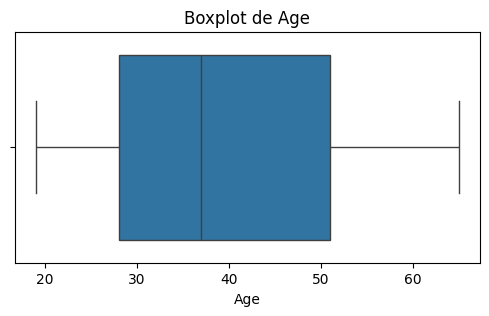

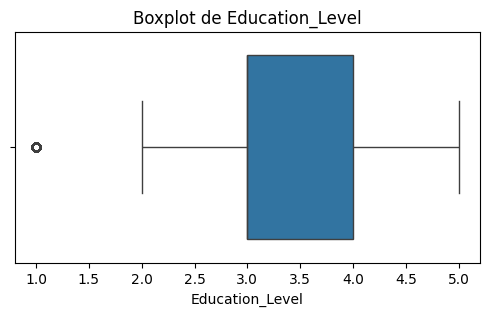

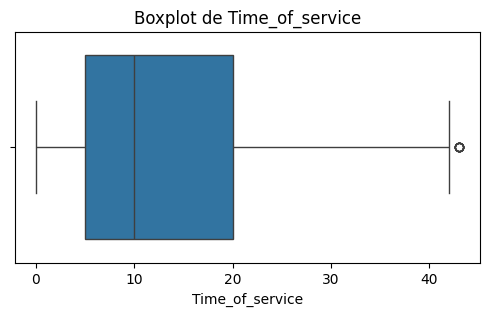

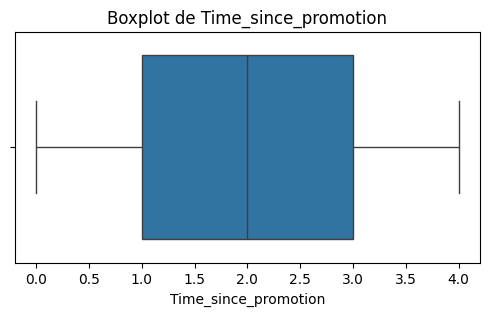

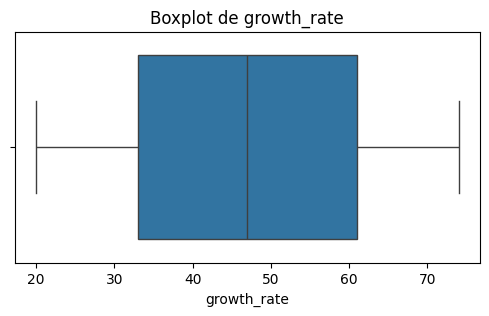

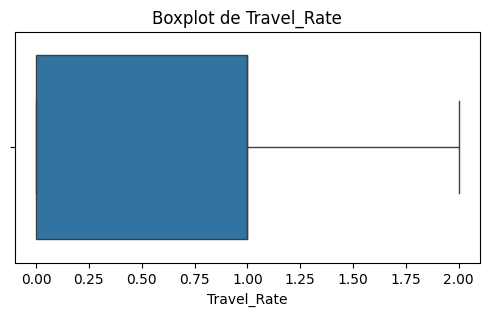

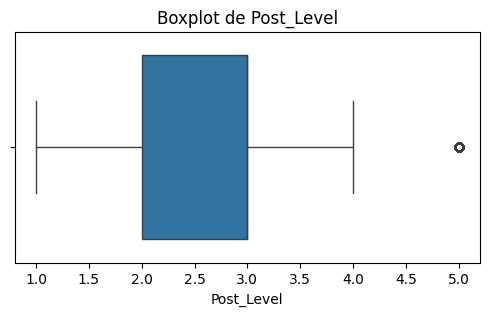

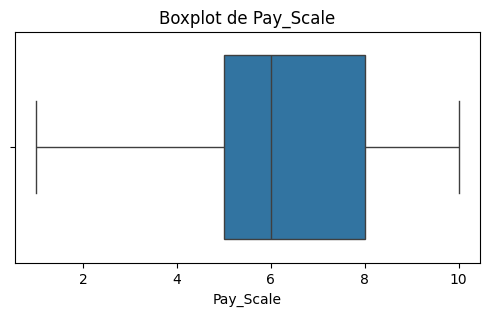

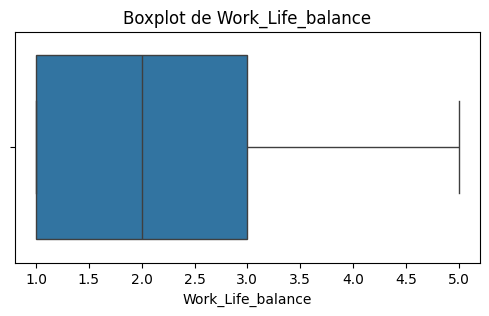

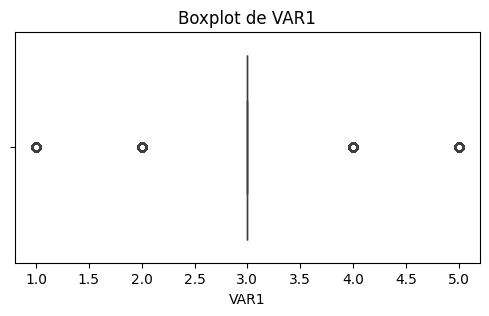

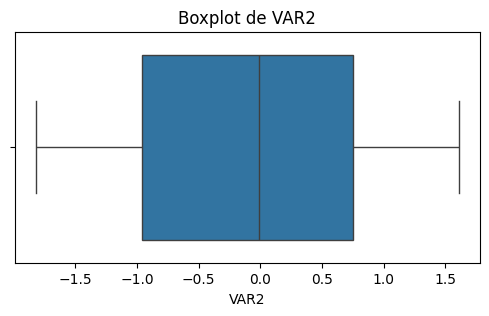

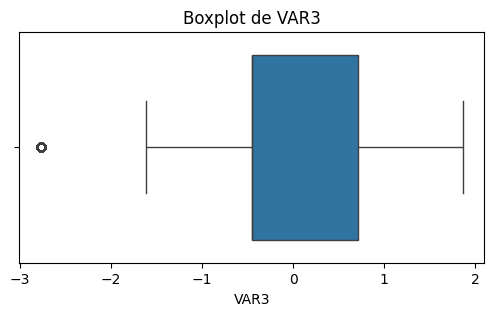

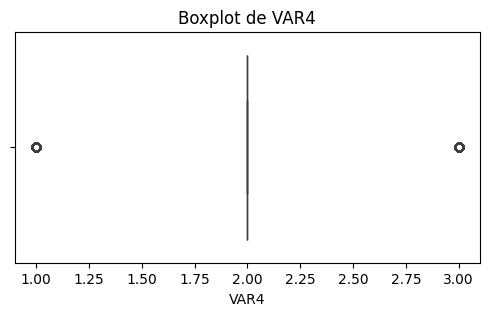

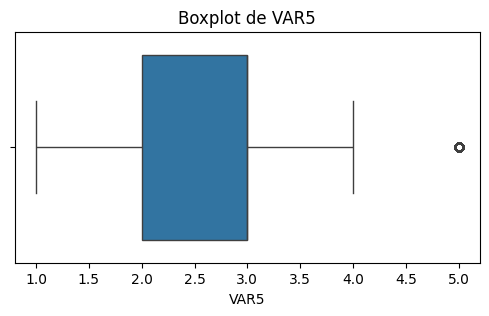

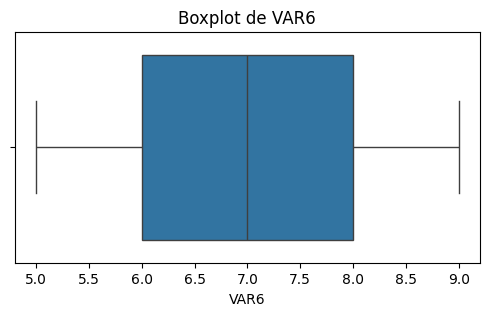

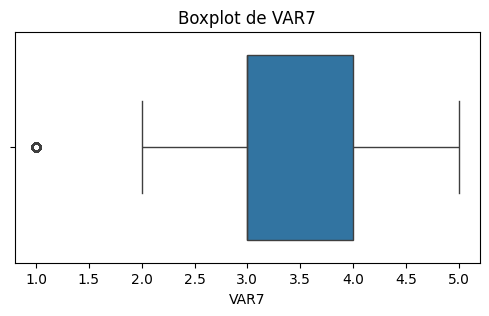

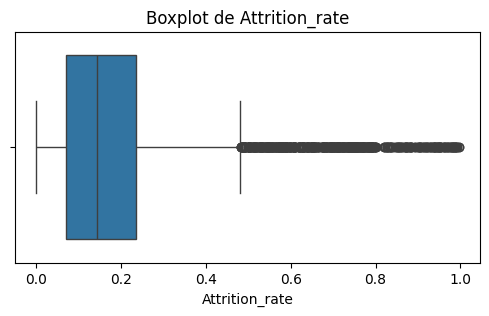

In [ ]:
import seaborn as sns

num_cols = train.select_dtypes(include=['int64','float64']).columns

for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=train[col])
    plt.title(f"Boxplot de {col}")
    plt.show()

Durante la revisión con boxplots y estadísticas descriptivas se identificaron valores atípicos en varias variables. Sin embargo, en lugar de eliminarlos o transformarlos, se tomó la siguiente decisión:

Education_Level (outliers inferiores): no se modifican, ya que precisamente en los niveles bajos es donde se observa mayor tasa de deserción. Quitar esos registros ocultaría un patrón importante.

Time_of_service (outliers superiores): no se tocan, pues aunque son casos poco frecuentes, sí existen empleados con muchos años de servicio y representan un perfil válido.

Post_Level (outliers superiores): no se modifican, porque esta variable tiene un rango definido de 1 a 5, y todos los valores están dentro de ese rango lógico.

VAR1 a VAR7 (outliers): no se tocan, ya que estas variables provienen de una reducción de dimensionalidad (PCA) y los valores extremos forman parte natural de su distribución.

Attrition_rate (outliers superiores): no se modifican, dado que es la variable objetivo dentro del clustering y refleja la tasa de deserción, que naturalmente puede acercarse a 1 en algunos casos.

En conclusión, no se aplicó recorte ni eliminación de outliers, ya que los casos identificados son consistentes con la lógica de negocio o forman parte de la variabilidad natural de los datos. Además, todas las variables serán escaladas posteriormente, lo que reduce el impacto de los valores extremos en el proceso de clustering.

# **10. Codificación de variables categóricas**

**a) Compensation_and_Benefits**

La columna Compensation_and_Benefits contiene valores en formato de texto, donde cada registro aparece como "Type" seguido de un número (por ejemplo, "Type1", "Type2", "Type3").
Dado que lo que nos interesa para el análisis son únicamente los números que identifican cada tipo, transformamos esta columna a formato numérico.

In [ ]:
train['Compensation_and_Benefits'] = train['Compensation_and_Benefits'].astype(str).str.replace('type','', regex=False).astype('Int64')


In [ ]:
 train.select_dtypes(include=['object']).columns.tolist()

['Gender', 'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess']

In [ ]:
train2 = train.copy()
for col in train2.columns:
    if train2[col].dtype == 'object':
        train2[col] = OrdinalEncoder().fit_transform(train2[[col]])
X_train = train2.to_numpy()
print(X_train)

[[0.0 42.0 4 ... 5 3 0.1841]
 [1.0 24.0 3 ... 5 3 0.067]
 [0.0 58.0 3 ... 8 3 0.0851]
 ...
 [0.0 49.0 3 ... 8 3 0.7847]
 [0.0 47.0 3 ... 6 3 0.4162]
 [0.0 58.0 3 ... 5 3 0.091]]


# 11. Exploración gráfica de las variables frente a la tasa de **deserción**

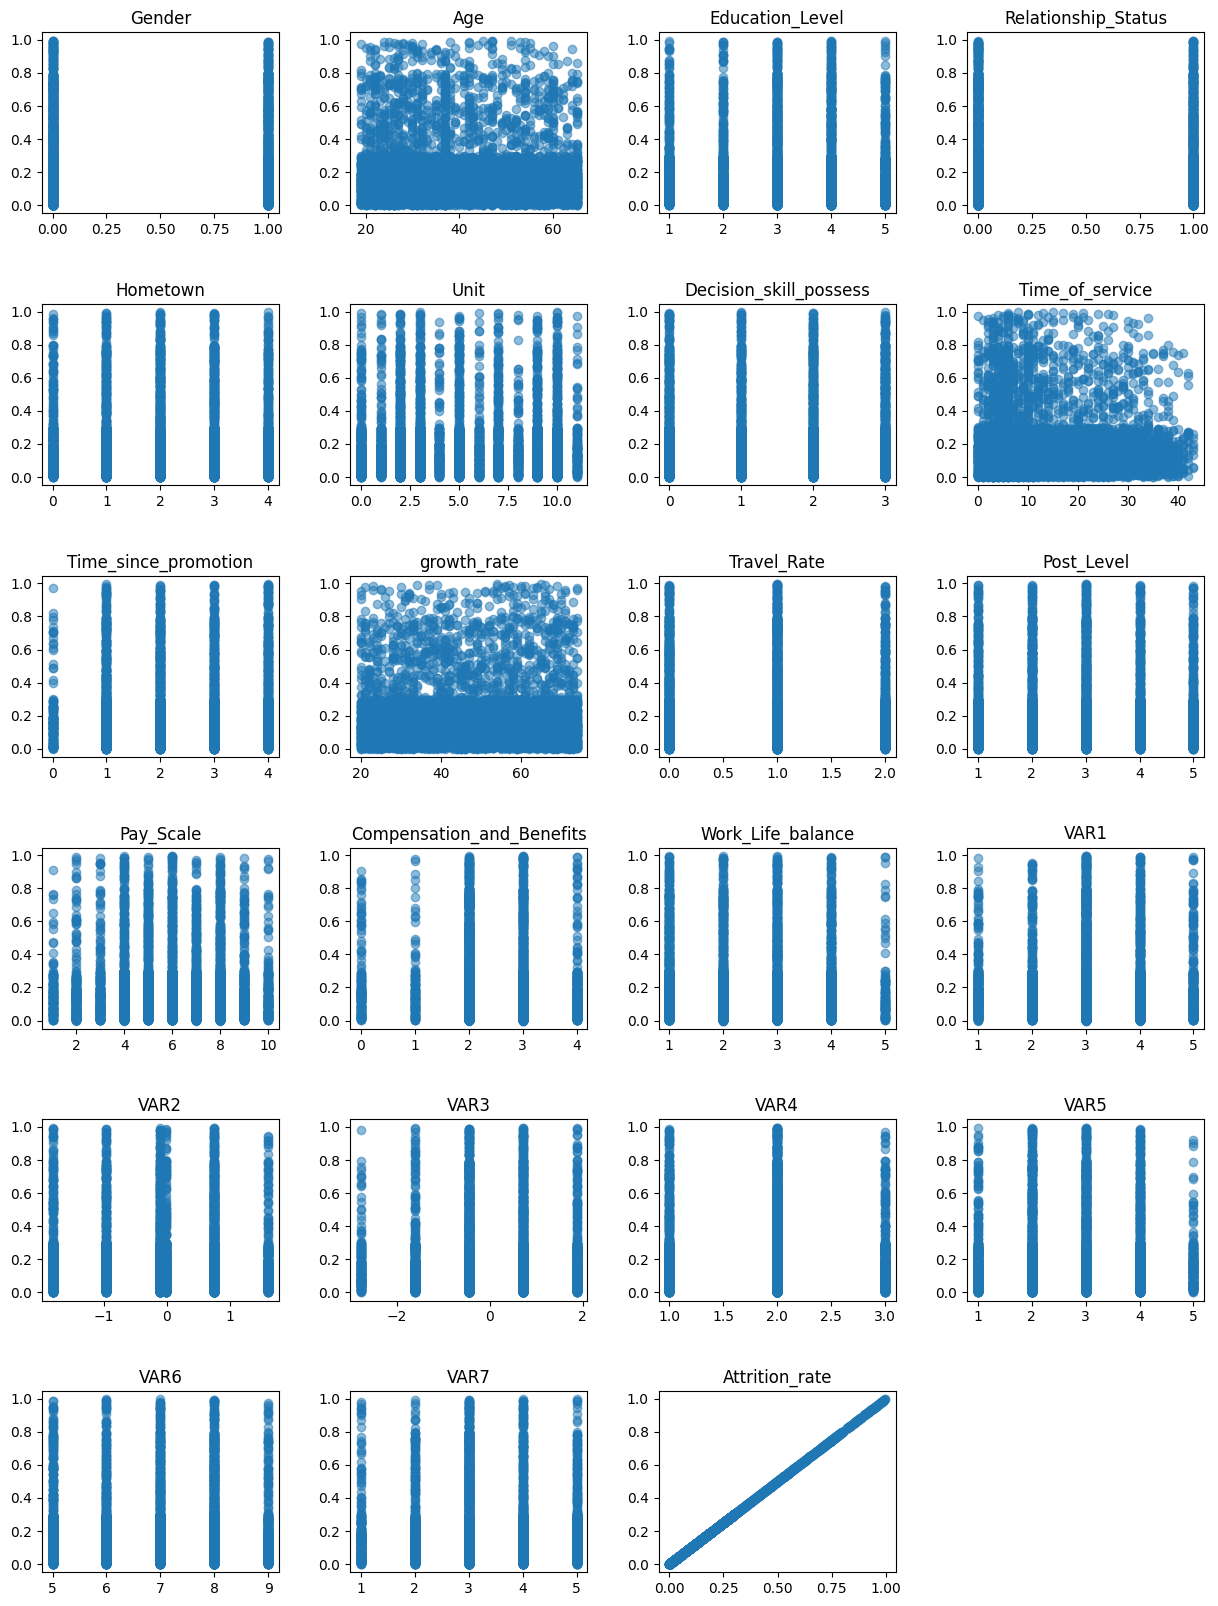

In [ ]:
v = 0
fig, axs = plt.subplots(6, 4, figsize=(15, 20))  # 6 filas x 4 columnas = 24 subplots

for i in range(6):
    for j in range(4):
        if v < X_train.shape[1]:   # asegurar que no pasamos de las columnas
            axs[i, j].scatter(X_train[:, v], X_train[:, -1], alpha=0.5)
            axs[i, j].set_title(train2.columns[v])
            v += 1
        else:
            axs[i, j].axis("off")  # apaga el subplot sobrante

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

# 12. **Escalamiento** de variables (StandardScaler)

In [ ]:
X = StandardScaler().fit_transform(X_train)

In [ ]:
X

array([[-0.83756018,  0.19158484,  0.76255659, ..., -1.80495079,
        -0.27776175, -0.02840599],
       [ 1.19394406, -1.17062324, -0.17638732, ..., -1.80495079,
        -0.27776175, -0.65885713],
       [-0.83756018,  1.40243646, -0.17638732, ...,  0.77197263,
        -0.27776175, -0.56140908],
       ...,
       [-0.83756018,  0.72133242, -0.17638732, ...,  0.77197263,
        -0.27776175,  3.20514613],
       [-0.83756018,  0.56997597, -0.17638732, ..., -0.94597631,
        -0.27776175,  1.22119016],
       [-0.83756018,  1.40243646, -0.17638732, ..., -1.80495079,
        -0.27776175, -0.52964425]])

# 13. Selección del número de **clusters**

## Al comparar los tres métodos, el codo mostró un quiebre en k=4, mientras que Silhouette y Calinski-Harabasz dieron su máximo en k=2. Sin embargo, dos clusters serían demasiado generales y poco útiles. Además, en Silhouette se observa que la caída más fuerte ocurre después de k=4, lo que refuerza esa elección. Por ello, se concluye que el número óptimo de clusters es k=4.

## 13.1 Método del codo (Elbow Method)

In [ ]:
np.random.seed(42)

In [ ]:
nc = 10

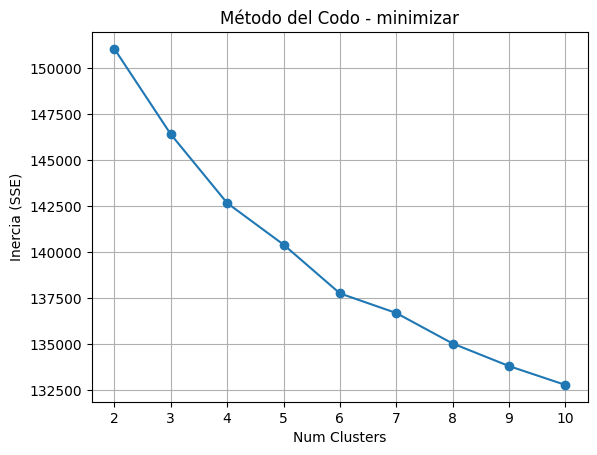

In [ ]:
inertias = []
K = range(2, 11)

for k in K:
    km = cluster.KMeans(n_clusters=k, n_init=10, random_state=42).fit(X)
    inertias.append(km.inertia_)   # suma de distancias intra-cluster (SSE)

plt.plot(K, inertias, 'o-')
plt.xlabel('Num Clusters')
plt.ylabel('Inercia (SSE)')
plt.title('Método del Codo - minimizar')
plt.grid(True)
plt.show()

## 13.2 Índice de Calinski-Harabasz

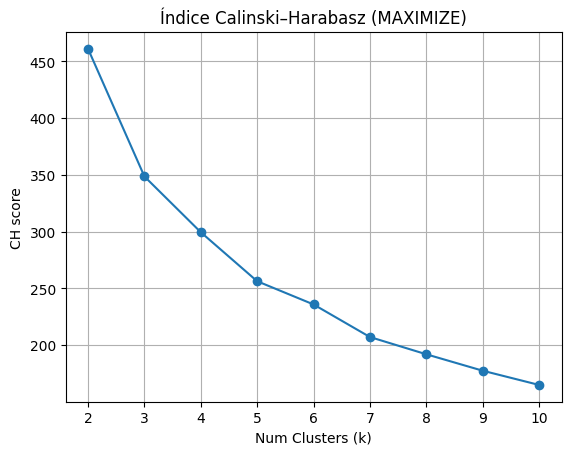

In [ ]:
K = range(2, 11)

ch_scores = []
for k in K:
    km = cluster.KMeans(n_clusters=k, n_init=10, random_state=42).fit(X)
    labels = km.labels_
    ch = metrics.calinski_harabasz_score(X, labels)
    ch_scores.append(ch)

plt.plot(list(K), ch_scores, 'o-')
plt.grid(True)
plt.title('Índice Calinski–Harabasz (MAXIMIZE)')
plt.xlabel('Num Clusters (k)')
plt.ylabel('CH score')
plt.xticks(list(K))
plt.show()

best_k_ch = list(K)[int(np.argmax(ch_scores))]

## 13.3 Índice de Silhouette

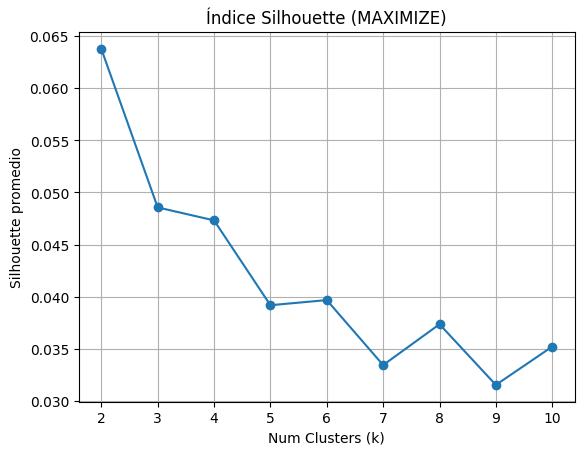

In [ ]:
K = range(2, 11)

sil_scores = []
for k in K:
    km = cluster.KMeans(n_clusters=k, n_init=10, random_state=42).fit(X)
    labels = km.labels_
    sil = metrics.silhouette_score(X, labels)
    sil_scores.append(sil)

plt.plot(list(K), sil_scores, 'o-')
plt.grid(True)
plt.title('Índice Silhouette (MAXIMIZE)')
plt.xlabel('Num Clusters (k)')
plt.ylabel('Silhouette promedio')
plt.xticks(list(K))
plt.show()

best_k_sil = list(K)[int(np.argmax(sil_scores))]

# 14. Entrenamiento del modelo de clustering (KMeans)

## 14.1 Entrenamiento del modelo con k=**4**


In [ ]:
k = 4 # Segun la grafica de Silhouette
k_means = cluster.KMeans(n_clusters=k).fit(X)
y_pred = k_means.predict(X)

In [ ]:
y_pred

array([2, 2, 1, ..., 3, 1, 1], dtype=int32)

## 14.2 Asignación de etiquetas de **cluster**

In [ ]:
train['group'] = y_pred
train

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,...,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate,group
0,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,...,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841,2
1,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,...,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670,2
2,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,...,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851,1
3,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,...,1.0,3,-1.8176,-0.4537,2.0,3,7,3,0.0668,2
4,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,...,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,F,23.0,5,Married,Franklin,Operarions,Behavioral,4.0,1,20,...,3.0,1,0.7516,-0.4537,2.0,3,7,3,0.7839,3
6996,F,44.0,1,Married,Lebanon,R&D,Analytical,16.0,2,59,...,3.0,2,-0.1048,-2.7762,2.0,4,8,4,0.1055,1
6997,F,49.0,3,Single,Springfield,IT,Directive,10.0,1,59,...,4.0,2,-0.1048,-0.4537,2.0,4,8,3,0.7847,3
6998,F,47.0,3,Married,Washington,Sales,Behavioral,24.0,1,21,...,2.0,4,0.7516,1.8688,2.0,3,6,3,0.4162,1


# 15. Segmentación de los datos y perfilado de **clusters**

## 15.1 Separar los datos por cluster y contar tamaños

In [ ]:
trains = []
for g in range(k):
  trains.append(train[train['group']==g])

In [ ]:
for g in range(k):
    print('Group'+str(g),'has',len(trains[g]),'employees.')

Group0 has 2300 employees.
Group1 has 2133 employees.
Group2 has 1966 employees.
Group3 has 601 employees.


## 15.2 Revisar los centroides del modelo

In [ ]:
k_means.cluster_centers_

array([[ 9.48876514e-03, -7.01352432e-01,  1.01767523e-02,
         1.19471670e-02,  1.29248854e-03, -2.92694461e-02,
        -2.38166733e-02, -6.99312258e-01, -8.62302860e-01,
        -1.66311636e-02, -1.38950711e-03,  3.96059263e-03,
         1.51220834e-02,  3.03780165e-02, -1.11442958e-02,
        -2.97072920e-03,  5.73070337e-03, -5.47450923e-03,
         3.48109767e-03, -7.07862425e-04, -3.32225716e-02,
        -1.46140929e-02, -2.62868831e-01],
       [-3.08634625e-02,  1.17579206e+00, -2.45187552e-02,
        -2.63812267e-03, -2.77163525e-02, -2.22666689e-03,
         2.78041608e-02,  1.21526965e+00,  3.38098325e-02,
        -1.92202640e-02,  2.06222426e-02, -6.09740468e-03,
         2.97646515e-02,  1.64128292e-02,  7.48809760e-03,
         1.94785755e-02,  1.76448766e-02,  1.52216729e-02,
        -4.10778741e-04,  3.03467942e-02,  2.45480533e-02,
         2.47364477e-02, -2.31098459e-01],
       [-2.53718081e-02, -4.23695314e-01,  2.32457185e-02,
        -1.75743677e-02,  2.6

# **16. Tabla de perfiles por cluster (promedios/modas por variable)**

In [ ]:
grouped = pd.DataFrame()
grouped['Features'] = train.columns[:-1]
for g in range(k):
    arr = []
    for col in grouped['Features']:
        if trains[g][col].dtype != 'object':
            arr.append(np.round(trains[g][col].mean(),2))
        else:
            arr.append(trains[g][col].value_counts().keys()[0])
    grouped['Group'+str(g)] = arr
grouped

,Features,Group0,Group1,Group2,Group3
0,Gender,F,F,F,F
1,Age,30.2,55.01,33.87,38.11
2,Education_Level,3.2,3.16,3.21,3.16
3,Relationship_Status,Married,Married,Married,Married
4,Hometown,Lebanon,Lebanon,Lebanon,Lebanon
5,Unit,IT,IT,IT,IT
6,Decision_skill_possess,Analytical,Directive,Behavioral,Directive
7,Time_of_service,6.14,25.79,8.62,11.87
8,Time_since_promotion,1.38,2.41,3.47,2.4
9,growth_rate,46.8,46.76,47.44,47.9


# Conclusión general

## Clusters 1 y 3 (jóvenes y con bajo balance vida-trabajo) presentan mayor riesgo de rotación → requieren programas de retención y desarrollo de carrera.

## Cluster 2 (veteranos) representa la mayor estabilidad → deben aprovecharse como mentores.

## Cluster 0 (mediana edad y antigüedad intermedia) también es relativamente estable, pero el balance vida-trabajo bajo puede ser un foco de atención.

# **17. Conclusiones finales**

## Se aplicaron técnicas de clustering para segmentar empleados y, tras comparar codo, Silhouette y Calinski-Harabasz, se concluyó que k=4 es la opción más adecuada.

## Los clusters identificaron perfiles distintos: veteranos estables, jóvenes en ventas con bajo balance vida-trabajo, empleados de mediana carrera y jóvenes en etapa inicial.

## Esta segmentación permite orientar acciones específicas de retención, mentoría y desarrollo de carrera, apoyando la toma de decisiones en recursos humanos y la reducción de la deserción.